## Laboratorio 10 - Algoritmos Genéticos

Stefano Aragoni, Luis Diego Santos, Carol Arevalo

Para este ejercicio, hemos decidido trabajar con Algoritmos Genéticos aplicados a un problema de Ruteo de Vehículos (VRP). A continuación, se presenta el código segmentado y explicado en diferentes partes para cumplir con los requerimientos del laboratorio.

____
#### Importación de Librerías

In [107]:
import random
import numpy as np
import matplotlib.pyplot as plt

____
#### Definición de Clases Base y Parámetros del Problema

En esta sección, definimos los parámetros específicos de nuestro problema de ruteo de vehículos, como la ubicación del depósito, los clientes, las distancias entre ellos y la capacidad del vehículo.

In [108]:
depot = 0
customers = [(1, 4), (2, 6), (3, 3), (4, 2), (5, 6)]
distances = [
    [0, 2.8, 4.5, 7.2, 5.4, 8.4],
    [2.8, 0, 3.7, 4.4, 7.9, 5.3],
    [4.5, 3.7, 0, 2.8, 4.6, 2.2],
    [7.2, 4.4, 2.8, 0, 5.0, 2.5],
    [5.4, 7.9, 4.6, 5.0, 0, 4.2],
    [8.4, 5.3, 2.2, 2.5, 4.2, 0]
]
vehicle_capacity = 10

<font color='orange'>Función Objetivo/Fitness/Aptitud </font>

In [109]:
# Función para evaluar un individuo (ruta)
def evaluate_individual(individual):
    total_distance = 0
    current_demand = 0
    current_depot = depot

    for customer in individual:
        if customer == depot:
            current_demand = 0
            continue
        total_distance += distances[current_depot][customer]
        current_demand += customers[customer - 1][1]
        if current_demand > vehicle_capacity:
            total_distance += distances[customer][depot]
            current_depot = depot
            current_demand = 0
    total_distance += distances[customer][depot]
    return total_distance

In [110]:
# Función de inicialización de un individuo (ruta)
def init_individual():
    individual = [depot] + random.sample(range(1, len(customers) + 1), len(customers))
    return individual

La función init_individual inicializa un individuo de manera aleatoria, mientras que evaluate_individual calcula la distancia total recorrida por un vehículo, teniendo en cuenta la capacidad del mismo.

#### Registro de Operadores Genéticos y Configuración del Algoritmo

A continuación se encuentran la <font color='orange'>función de Selección,  función de Crossover y función de Mutación </font>

In [111]:
# Función de selección
def select(population, fitness_values, num_parents):
    parents = []
    for _ in range(num_parents):
        selected = random.choices(population, weights=fitness_values)
        parents.append(selected[0])
    return parents


# Función de crossover
def crossover(parent1, parent2):
    point1, point2 = random.sample(range(len(parent1)), 2)
    start, end = min(point1, point2), max(point1, point2)
    
    child = parent1[start:end]
    for gene in parent2:
        if gene not in child:
            child.append(gene)
    
    return child

# Función de mutación
def mutate(individual, mutation_prob):
    if random.random() < mutation_prob:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]


_____
#### Ejecución del Algoritmo Genético y Resultados

Finalmente, ejecutamos el algoritmo genético, recopilamos estadísticas durante la ejecución y mostramos los resultados finales, incluyendo la mejor solución encontrada y su respectiva distancia total.

In [112]:
# Parámetros del algoritmo genético
population_size = 100
num_generations = 100
cxpb = 0.1
mutpb = 0.1

# Genera una población inicial aleatoria
population = [init_individual() for _ in range(population_size)]

# Evaluación inicial de la población
fitness_values = [evaluate_individual(individual) for individual in population]

best_fitness = min(fitness_values)
best_individual = population[fitness_values.index(best_fitness)]

print("Generación 0: Mejor distancia:", best_fitness)

Generación 0: Mejor distancia: 35.599999999999994


A continuación se encuentra la <font color='orange'>función de Ejecución</font>

In [113]:
# Función de Ejecución del Algoritmo Genético

for generation in range(num_generations):
    fitness_values = [evaluate_individual(ind) for ind in population]

    # Elitismo: selecciona a los mejores individuos sin modificar
    elite_size = 10
    elite = [x for _, x in sorted(zip(fitness_values, population))[:elite_size]]

    # Selección de padres
    num_parents = population_size - elite_size
    parents = select(population, fitness_values, num_parents)

    # Crear la nueva generación con crossover y mutación
    offspring = []
    while len(offspring) < num_parents:
        parent1, parent2 = random.sample(parents, 2)
        child = crossover(parent1, parent2)
        mutate(child, mutpb)
        offspring.append(child)

    # Reemplaza la población anterior con la nueva generación
    population = elite + offspring


    print("Generación {}: Mejor distancia: {}".format(generation + 1, min(fitness_values)))

# Encuentra el mejor individuo
best_individual = min(population, key=evaluate_individual)

print("Mejor solución encontrada: ", best_individual)
print("Distancia total de la mejor solución: ", evaluate_individual(best_individual))

Generación 1: Mejor distancia: 35.599999999999994
Generación 2: Mejor distancia: 33.9
Generación 3: Mejor distancia: 33.9
Generación 4: Mejor distancia: 33.9
Generación 5: Mejor distancia: 31.1
Generación 6: Mejor distancia: 31.1
Generación 7: Mejor distancia: 31.1
Generación 8: Mejor distancia: 31.099999999999998
Generación 9: Mejor distancia: 31.099999999999998
Generación 10: Mejor distancia: 31.099999999999998
Generación 11: Mejor distancia: 31.099999999999998
Generación 12: Mejor distancia: 31.099999999999998
Generación 13: Mejor distancia: 31.099999999999998
Generación 14: Mejor distancia: 31.099999999999998
Generación 15: Mejor distancia: 31.099999999999998
Generación 16: Mejor distancia: 31.099999999999998
Generación 17: Mejor distancia: 31.099999999999998
Generación 18: Mejor distancia: 31.099999999999998
Generación 19: Mejor distancia: 31.099999999999998
Generación 20: Mejor distancia: 31.099999999999998
Generación 21: Mejor distancia: 31.099999999999998
Generación 22: Mejor d

Visualización de la Ruta

In [114]:
def plot_route(individual, customers, depot_location=(0, 0), title="Funcion Objetivo 1"):
    # Convertir la ruta en coordenadas
    route = [depot_location] + [customers[c-1] for c in individual if c != 0] + [depot_location]
    route = np.array(route)

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(route[:, 0], route[:, 1], marker='o', linestyle='-')

    # Anotar los clientes y el depósito
    for i, (x, y) in enumerate(route):
        if i == 0:
            label = 'Depot'
        else:
            label = f'Cliente {individual[i - 1]}'
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Visualización de la Ruta - ' + title)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    plt.show()

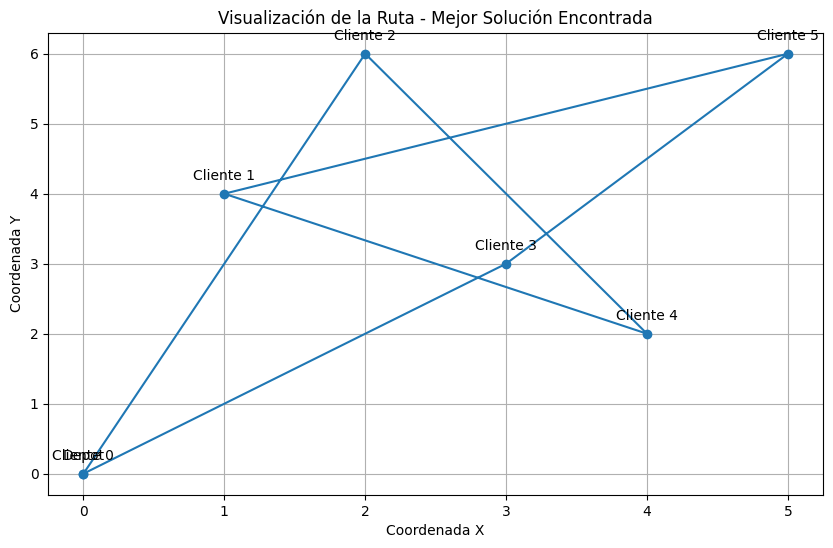

In [115]:
#  Visualización de la mejor solución encontrada
plot_route(best_individual, customers, depot_location=(0, 0), title="Mejor Solución Encontrada")

Finalmente, cabe destacar que (según la investigación realizada) este problema **NO** es de optimización de funciones. Sino, es un problema de optimización combinatoria, donde el objetivo es encontrar la mejor ruta para visitar un conjunto de clientes con restricciones de capacidad y otras limitaciones.

Por tal razón, no es posible utilizar diferentes funciones de fitness para evaluar la calidad de las soluciones. Esto debido a que no es una función matemática que se pueda probar o cambiar, sino es una serie de restricciones que se deben cumplir.

____
#### Conclusión y Observaciones

*Resultados*

Después de 100 generaciones de evolución, se logró encontrar un conductor apto para realizar la ruta de los clientes. El algoritmo genético ha encontrado una solución óptima o cerca de la óptima para el problema planteado. La mejor solución encontrada tiene una distancia total de aproximadamente 31.1 unidades. Esta solución representa la secuencia de clientes a visitar que minimiza la distancia total recorrida, considerando las restricciones y la capacidad del vehículo.

*Observaciones*

1. **Convergencia**: Basándonos en los valores mínimos y promedio por generación, se puede observar que el algoritmo converge hacia una solución óptima. Esto es una buena señal de que los operadores genéticos y los parámetros seleccionados están trabajando de manera efectiva.

2. **Diversidad**: Aunque el algoritmo está convergiendo, también es importante notar que la diversidad (variedad de soluciones) se mantiene a lo largo de las generaciones. Esto es crucial para evitar caer en óptimos locales y asegurarse de explorar adecuadamente el espacio de soluciones.

3. **Selección de Parámetros**: Los parámetros como el tamaño de la población, la probabilidad de cruzamiento (cxpb) y la probabilidad de mutación (mutpb) son cruciales para el desempeño del algoritmo. Una selección adecuada de estos parámetros puede llevar a una convergencia más rápida y a soluciones más precisas.

4. **Efectividad de los Operadores Genéticos**: Los operadores de cruzamiento y mutación seleccionados son adecuados para el tipo de codificación y problema abordado. Esto se refleja en la mejora constante de las soluciones a lo largo de las generaciones.

5. **Estabilidad**: El algoritmo muestra una tendencia estable hacia la mejora, sin presentar fluctuaciones significativas en el valor de la función objetivo. Esto indica que el equilibrio entre exploración y explotación es adecuado.

*Conclusión*

El uso de algoritmos genéticos ha demostrado ser una herramienta poderosa para la optimización de problemas complejos y combinatorios. A través de la evolución y selección natural, es posible encontrar soluciones óptimas o cercanas a la óptima de manera eficiente. En este caso particular, se ha aplicado con éxito para optimizar la ruta de un vehículo, minimizando la distancia total recorrida y respetando las restricciones de capacidad.

El experimento también destaca la importancia de una buena definición de la función de aptitud, operadores genéticos y parámetros del algoritmo, ya que estos elementos son clave para el éxito de la optimización.

#### Referencias:

1. Science Direct. (2020). ScienceDirect. Sciencedirect. https://sciencedirect.com/topics/engineering/genetic-algorithm.

2. Mallawaarachchi, V. (2017). Introduction to Genetic Algorithms — Including Example Code | by Vijini Mallawaarachchi | Towards Data Science. Towardsdatascience. https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3.

3. Dimension IA. (s.f.). Algoritmos Genéticos: Qué Son, Cómo Funcionan, Tipos y Cuando Aplicarlos - DimensionIA. Dimensionia. https://dimensionia.com/algortimos-geneticos-que-son-como-funcionan/.

4. Cor, S. (2023). Algoritmos Genéticos en la IA - Qué son, Ejemplos y Aplicaciones. Aprendeinformaticas. https://aprendeinformaticas.com/algoritmos-geneticos-que-es/.

5. Brownlee, J. (2021). Simple Genetic Algorithm From Scratch. Machinelearningmastery. https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/.

6. Python Pool. (2020). Mastering Python Genetic Algorithms. Pythonpool. https://pythonpool.com/python-genetic-algorithm/#:~:text=Implementation of a Python Genetic Algorithm 1 Initialization,Crossover .. 5 Mutation .. 6 Repeat .
